# Simple machine learning example using [Scikit Learn](https://scikit-learn.org/stable/index.html) package

Scikit learn contains methods for manipulating and preprocessing data, regression, classification, unsupervised learning, model evaluation and more

In [ ]:
# sklearn.dataset provides access to several toy datasets https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn import datasets

# sklearn.linear_model provide linear classification and regression models https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
from sklearn import linear_model

import matplotlib.pyplot as plt
import  numpy as np

# Load dataset
datasets.load_[ ...]
datasets.fetch_[ ...]

Divide data into training and testing subsets (even and odd).

In [ ]:
# Load the digits dataset
dataset = datasets.load_breast_cancer()

# Use this dataset to classify digits
#dataset = datasets.load_digits()

training_data = dataset.data[::2]
training_targets = dataset.target[::2]

testing_data = dataset.data[1::2]
testing_targets = dataset.target[1::2]


In [ ]:
# print description if it is available
if hasattr(dataset, 'DESCR'):
    print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

# Show sample images from the dataset

In [1]:
#  Display the dataset as images (if possible)
if hasattr(dataset, 'images'):
  plt.figure(1, figsize=(3, 3))
  plt.imshow(dataset.images[10], cmap=plt.cm.gray, interpolation='nearest')
  plt.show()
  plt.figure(1, figsize=(6, 6))
  shape = dataset.images[0].shape
  plt.imshow(dataset.data[:16].reshape(4,4,shape[0],shape[1]).swapaxes(1, 2).reshape(4*shape[0],4*shape[1]), cmap=plt.cm.gray, interpolation='nearest')
  plt.show()


NameError: ignored

# Show samples from the dataset as features

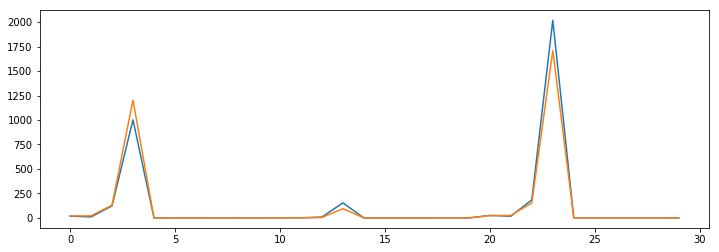

In [ ]:
plt.figure(1, figsize=(12, 4))  # define the size of the figure to make it more readable 
for i in range(2):   # plot only the first two data samples
  plt.plot(training_data[i, :256])   # plot at most the first 256 features
plt.show()

# Create a classification model and fit it to data

This code uses [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), which is a linear classification model predicting probabilities of classes given the input data.

[See explanation for two classes.](https://medium.com/data-science-group-iitr/logistic-regression-simplified-9b4efe801389)

*   **multinomial** - One data point belongs to a single class (classes are exclusive).  When the problem has 3 and more classes, the model actually solves [Multinomial Logistic regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression).
*  **lbfgs**  - [is a very fast optimization algorithm](https://en.wikipedia.org/wiki/Limited-memory_BFGS). You can change it to make the optimization slower :).




In [ ]:
#  Create the model.
model = linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=5000)

#  Train the model on data (inputs and ground truth labels)
model.fit(training_data, training_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Some helper functions

In [ ]:
def add_noise_to_data(eval_data, noise_strength=0):
  noisy_data = eval_data + np.random.normal(scale=noise_strength, size=eval_data.shape)
  return noisy_data

def show_data(eval_data, noisy_data): 
  if hasattr(dataset, 'images'):
      shape=dataset.images[0].shape
      plt.figure(1, figsize=(9, 9))
      image_collage = noisy_data[:16].reshape(4,4,shape[0],shape[1]).swapaxes(1, 2).reshape(4*shape[0],4*shape[1])
      plt.imshow(image_collage, cmap=plt.cm.gray, interpolation='nearest')
      plt.show()
  else:
      plt.figure(1, figsize=(12, 4))
      plt.plot(eval_data[0, :256])
      plt.plot(noisy_data[0, :256])
      plt.show() 
      
def plot_roc(fpr, tpr, label=None):
    if fpr is not None:
      plt.plot(fpr, tpr, label=label)
      plt.xlabel('False positive rate')
      plt.ylabel('True positive rate')
      plt.legend()
      plt.xlim([0,1])
      plt.ylim([0,1])

      

In [ ]:
import sklearn.metrics

def evaluate_model(eval_data, eval_targets, noise_strength=0):
    #  add noise to data to make the problem harder
    noisy_data = add_noise_to_data(eval_data, noise_strength) 
    show_data(eval_data, noisy_data)
    
    #  Compute probabilities of all classes for all object
    probs = model.predict_proba(noisy_data)
    print('predicted probability shape (#objects x #features)', probs.shape)

    #  If we want to keep it simple, we can just select 
    #  predicted classes as those with the highest probability.
    #  (https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html)
    predicted_classes = probs.argmax(axis=1)
    print('predicted classes', predicted_classes[:16])

    #  Accuracy is the proportion of predicted labels matching the ground truth (target) labels
    accuracy = np.average(predicted_classes == eval_targets)
    print('prediction accuracy', accuracy)
    
    #  sklearn can do the computation for you 
    #print('prediction scikit accuracy', sklearn.metrics.accuracy_score(eval_targets, predicted_classes))

    #  If the classification task is binary (2 classes), we can compute an ROC curve https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
    fpr = None
    tpr = None
    if len(set(dataset.target)) == 2:
        precision = precision_score(eval_targets, predicted_classes)
        recall = recall_score(eval_targets, predicted_classes)
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 score is {2 * (precision * recall) / (precision + recall)}")
        
        fpr, tpr, thresholds = sklearn.metrics.roc_curve(eval_targets, probs[:, 1])
        
    return accuracy, fpr, tpr


# Test the model on training and testing data

The model should give better results on training data.

(285, 30) (285,)


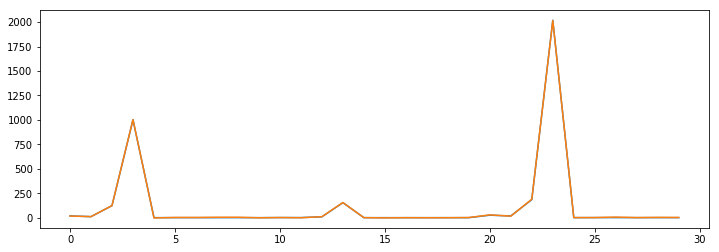

predicted probability shape (#objects x #features) (285, 2)
predicted classes [0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0]
prediction accuracy 0.9157894736842105
Precision: 0.9441340782122905
Recall: 0.9234972677595629
F1 score is 0.9337016574585636


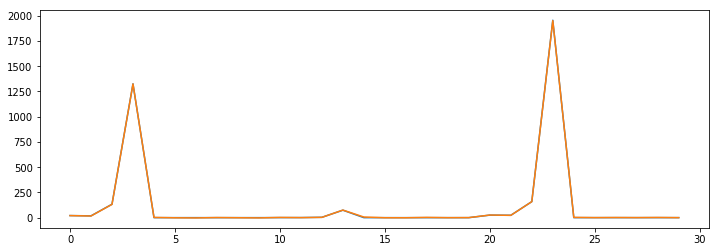

predicted probability shape (#objects x #features) (284, 2)
predicted classes [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
prediction accuracy 0.8661971830985915
Precision: 0.8908045977011494
Recall: 0.8908045977011494
F1 score is 0.8908045977011495


In [ ]:
noise_strength = 2

print(training_data.shape, training_targets.shape)
trn_accuracy, trn_fpr, trn_tpr = evaluate_model(training_data, training_targets, noise_strength)    
tst_accuracy, tst_fpr, tst_tpr = evaluate_model(testing_data, testing_targets, noise_strength)    


# Show receiver operating characteristic (ROC) curve if the the classification task is binary

Example precision: 0.3333333333333333
Example recall: 0.5
Example F1 score is 0.4


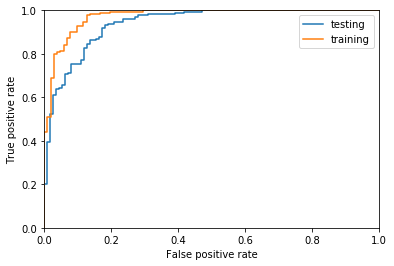

In [ ]:
from sklearn.metrics import recall_score, precision_score
y_true = [0, 1, 0, 1, 0, 0]
y_pred = [0, 1, 0, 0, 1, 1]
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Example precision: {precision}")
print(f"Example recall: {recall}")
print(f"Example F1 score is {2 * (precision * recall) / (precision + recall)}")


plot_roc(tst_fpr, tst_tpr, 'testing')
plot_roc(trn_fpr, trn_tpr, 'training')
plt.show()


